<font size="+5">#02. Machine Learning & Linear Regression</font>

<ul>
    <li>Doubts? → Ask me in <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutorials → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Book Private Lessons → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Load the Data

> By running the following commands:

```python
import seaborn as sns
sns.get_dataset_names()
```

> You'll observe a list of posible `tables` that we could work with.
> You may use whichever you'd like.
> Just substitue `?` by the name of the dataset you want.

```python
sns.load_dataset(name=?)
```

In [3]:
import seaborn as sns 
sns.get_dataset_names()
df =sns.load_dataset(name='penguins')

In [4]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# `LinearRegression()` Model in Python

In [8]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

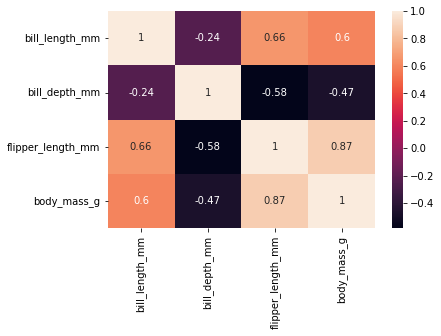

In [10]:
sns.heatmap(df.corr(), annot=True)

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

In [13]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [14]:
df = df.dropna() # df.dropna(inplace=True)

In [15]:
from sklearn.linear_model import LinearRegression

explanatory = df[['body_mass_g']]
target = df[['flipper_length_mm']]

> - By the time you get to the actual `function()` to compute the model
> - You'll notice they're asking you for two parameters:
> 1. `X`: **explanatory variable**
> 2. `y`: **target varaible**
> It's recommended that you make a `Data Visualization`
>
> - To analyze if the two variables are related?
> - i.e., do you think `X` variable is good to predict `y`?
> - If so, the Linear Regression would be great!

### Scatterplot con las Variables

> You may observe in the plot that the points could be related through a line.
>
> Otherwise, you may select another pair of variables.

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

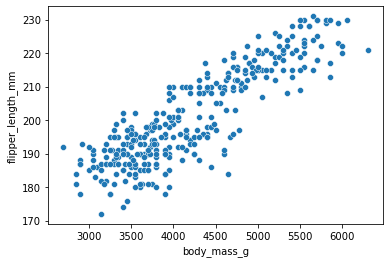

In [16]:
sns.scatterplot(data=df,x='body_mass_g', y='flipper_length_mm')

### `fit()` the Model

> - Pass the `objects` that **contains the sequence of numbers** of the two variables
> - To the `parameters` of the function that computes the Linear Regression Model

In [17]:
linear=LinearRegression()
linear.fit(X=explanatory, y=target)

LinearRegression()

## Model Interpretation

> 1. Especify the **mathematical equation** of the model.
> 2. **Interpret the coefficients** from the equation.

In [18]:
linear.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([[0.01519526]]),
 '_residues': array([15516.02514342]),
 'rank_': 1,
 'singular_': array([14671.73016096]),
 'intercept_': array([137.03962089])}

In [19]:
linear.coef_

array([[0.01519526]])

In [20]:
linear.intercept_

array([137.03962089])

In [21]:
# flipper_length_mm = 136.729 + 0.015 * body_mass_g

In [22]:
a = 500

In [23]:
flipper_predict = 136.729 + 0.015 * a
flipper_predict

144.229

In [24]:
b = 1200

In [25]:
flipper_predict1 = 136.729 + 0.015 * b
flipper_predict1

154.729

In [26]:
flipper_predict1- flipper_predict

10.5

## Calculate Predictions

> - `model.predict()`

In [27]:
linear.predict(X=[[a]])

array([[144.6372533]])

In [28]:
dfaux = df[['body_mass_g', 'flipper_length_mm']].copy()

In [31]:
dfaux.head()

,body_mass_g,flipper_length_mm,pred
0,3750.0,181.0,194.021864
1,3800.0,186.0,194.781627
2,3250.0,195.0,186.424232
4,3450.0,193.0,189.463285
5,3650.0,190.0,192.502337


In [32]:
dfaux['pred'] = linear.predict(X=explanatory)
dfaux.head()

,body_mass_g,flipper_length_mm,pred
0,3750.0,181.0,194.021864
1,3800.0,186.0,194.781627
2,3250.0,195.0,186.424232
4,3450.0,193.0,189.463285
5,3650.0,190.0,192.502337


## Visualize the Model

> 1. **Real Data**.
> 2. **Model: predictions** calculated with the mathematical equation.

<AxesSubplot:xlabel='body_mass_g', ylabel='pred'>

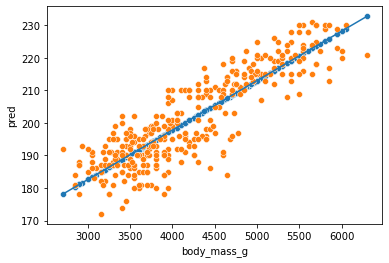

In [33]:
sns.scatterplot(x= 'body_mass_g', y = 'pred',data=dfaux)
sns.scatterplot(data=df,x='body_mass_g', y='flipper_length_mm')
sns.lineplot(x= 'body_mass_g', y = 'pred',data=dfaux)

# Real vs. Predicted Data

> How good is our model?
>
> 1. Create a new `DataFrame` column to assign the predictions.
>
> - `df['pred'] = predicciones`

In [34]:
dfaux['pred'] = linear.predict(X=explanatory)

> 2. How to measure the **model's error**?
> - How good is our model to predict reality?
> - `model.score()`

In [35]:
linear.score(X=explanatory, y=target)

0.7620921573403914

> - `df.sample(10)` para comprobar si las predicciones de nuestro modelo coinciden con la realidad...

In [36]:
df.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
158,Chinstrap,Dream,46.1,18.2,178.0,3250.0,Female
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,Female
315,Gentoo,Biscoe,50.8,15.7,226.0,5200.0,Male
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
162,Chinstrap,Dream,46.6,17.8,193.0,3800.0,Female
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,Female
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
145,Adelie,Dream,39.0,18.7,185.0,3650.0,Male
186,Chinstrap,Dream,49.7,18.6,195.0,3600.0,Male


# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand **how the Machine Learns/Optimizes the model**
    - [ ] No more than to find the best numbers in a mathematical equation.
- [ ] The `function()` as the indivisible part of programming.
    - As the **atom**: the key element in the Universe.
- [ ] Understand **what's going on inside the computer** as you execute a function.
    - Is the code downloaded online, or could we use it withoug internet conection.
- [ ] Use **programming as a tool**.
    - It's a **means to an end. NOT an end itself** (as hard as it may be to get started with).
- [ ] Understand that statistics is not a perfect science. 
    - It tries to **approximate to the reality** the best way it can.
- [ ] **Measuring the error** is nothing more than measuring the difference between reality and predictions.
- [ ] We may use more than one mathematical formula to calculate the same variable.
    - Different models/equations/algorightms to calculate the same variable.
    - Some models might be better than other ones.